<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1---Definition-of-the-Stress-tensor" data-toc-modified-id="1---Definition-of-the-Stress-tensor-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1 - Definition of the Stress tensor</a></span></li><li><span><a href="#2---For-a-single-normal-$\vec{n}$" data-toc-modified-id="2---For-a-single-normal-$\vec{n}$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2 - For a single normal $\vec{n}$</a></span><ul class="toc-item"><li><span><a href="#Definition-of-$\vec{n}$-:" data-toc-modified-id="Definition-of-$\vec{n}$-:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definition of $\vec{n}$ :</a></span></li><li><span><a href="#Computation-of-$\sigma_{nn}$-and-$\sigma_{nt}$" data-toc-modified-id="Computation-of-$\sigma_{nn}$-and-$\sigma_{nt}$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Computation of $\sigma_{nn}$ and $\sigma_{nt}$</a></span></li></ul></li><li><span><a href="#3---Test-random-orientations-of-the-normal-$\vec{n}$" data-toc-modified-id="3---Test-random-orientations-of-the-normal-$\vec{n}$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3 - Test random orientations of the normal $\vec{n}$</a></span></li></ul></div>

# Illusatration of the Morh Circles for genric stress state
Author : Emile.roux@univ-smb.fr

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.patches as patches
import matplotlib as mpl
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib nbagg

<ipython-input-2-0bb4b5c94013>:2: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.axislines import SubplotZero


# Function which projet $\vec{\phi}$ into the $(\vec{n}, \vec{t})$ space
$$ \newcommand{\norme}[1]{\left\Vert #1\right\Vert} $$
For a given stress state the stress flux is given by :
$$ \vec{\phi_n} = \sigma . \vec{n} $$

The normal stress component $\sigma_{nn}$ is obtain by projetcion of $\vec{\phi_n}$ on the normal
$$\sigma_{nn} = \vec{\phi_n} . \vec{n} $$

Then the shear stress compoant is computed using the fact that $\vec{\phi_n} = \sigma_{nn} \vec{n} + \sigma_{nt} \vec{t}$
$$\sigma_{nt} = \norme{\vec{\phi_n}  - \sigma_{nn} \vec{n}} $$


In [3]:
def Snn_Snt_decomposition (Sigma, n) :
    # Check that norm of n is one
    n=n/np.linalg.norm(n)
    
    # Flux stress vector
    phi=np.dot(Sigma,n)
    
    # Normal stress component
    Snn=np.dot(phi,n)
    
    # Shear stress component
    Snt=phi - Snn*n
    Snt=np.linalg.norm(Snt)  
    
    return Snn,Snt,phi

# Setting for graph display

<IPython.core.display.Javascript object>


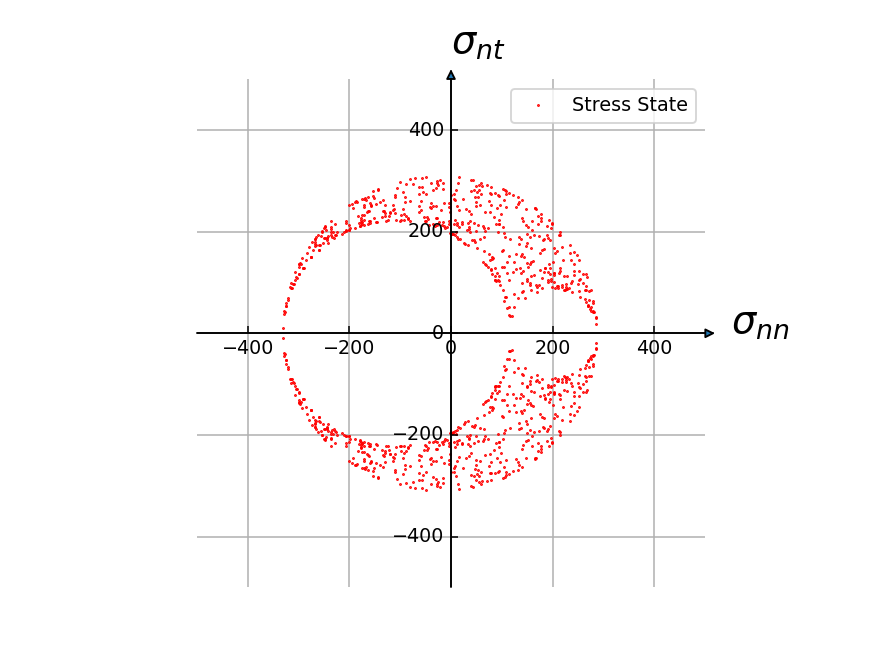

In [21]:

fig = plt.figure(1)
Sig_max=500.0
# Espace x,y
# Espace Snn,Snt
ax2 = SubplotZero(fig, 111)
fig.add_subplot(ax2)
#
for direction in ["xzero", "yzero"]:
    ax2.axis[direction].set_axisline_style("-|>")
    ax2.axis[direction].set_visible(True)
#
for direction in ["left", "right", "bottom", "top"]:
    ax2.axis[direction].set_visible(False)

ax2.set_aspect('equal')

ax2.set_xlim(-Sig_max, Sig_max)
ax2.set_ylim(-Sig_max, Sig_max)
ax2.text(0., 1.05, '$\sigma_{nt}$',size=20, transform=BlendedGenericTransform(ax2.transData, ax2.transAxes))
ax2.text(1.05, -0.15, '$\sigma_{nn}$',size=20, transform=BlendedGenericTransform(ax2.transAxes, ax2.transData))
ax2.grid()
mohr_circle, = ax2.plot([], [], '.r',label='Stress State', markersize=1)
ax2.legend()





In [5]:
plt.close(fig)

# Projection of the Stress state into the $(\vec{n}, \vec{t})$ space

## 1 - Definition of the Stress tensor 

In [16]:
# Norme componants
S11=100
S22=-50
S33=20.
#Shear Componants
S12=50
S13=-60
S23=300


In [17]:
# fullfill the tensor
Sigma=np.array([[S11,S12,S13],[S12,S22, S23 ],[S13,S23, S33]],float)
print("Sigma=", Sigma)

Sigma= [[100.  50. -60.]
 [ 50. -50. 300.]
 [-60. 300.  20.]]


## 2 - For a single normal $\vec{n}$
### Definition of $\vec{n}$ :

In [18]:
n=np.array([1, 0,0])

### Computation of $\sigma_{nn}$ and $\sigma_{nt}$

<IPython.core.display.Javascript object>


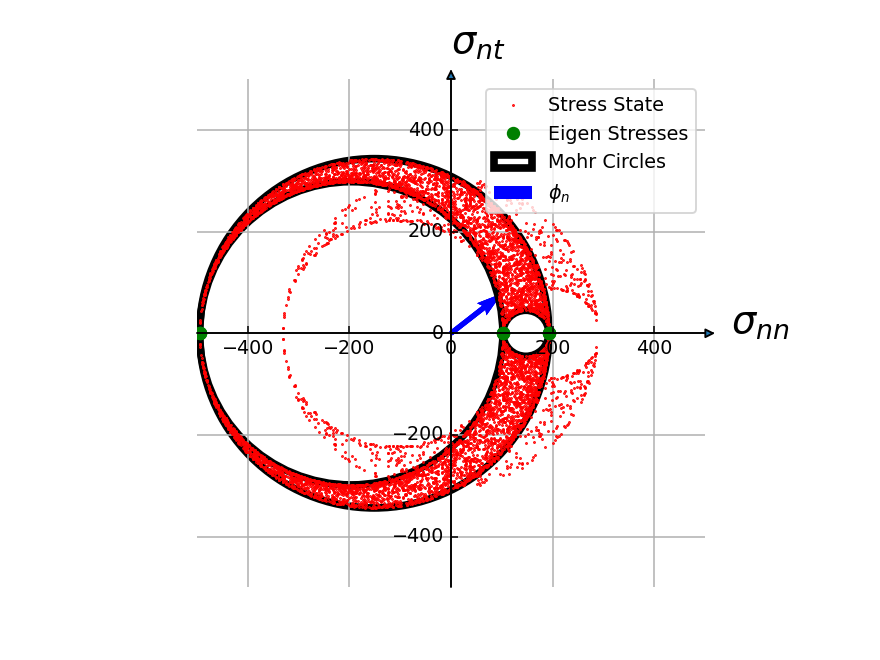

In [20]:
# call the previous difined function
Snn,Snt,phi = Snn_Snt_decomposition (Sigma, n)

# display on graph
x,y=mohr_circle.get_data()
mohr_circle.set_data(np.append(x,[Snn]), np.append(y,[Snt]))
ax2.quiver(0, 0, Snn, Snt,width=10,scale=1,units='x',label=r'$\phi_n$',color='b')
fig


In [10]:
plt.close(fig)


## 3 - Test random orientations of the normal $\vec{n}$

In [11]:
# animation function.  This is called sequentially
def animate(i):
    for j in range(10):
      n = np.random.rand(3)-.5
      Snn,Snt,phi = Snn_Snt_decomposition (Sigma, n)
      x,y=mohr_circle.get_data()
      mohr_circle.set_data(np.append(x,[Snn, Snn]), np.append(y,[Snt, -Snt]))
    return mohr_circle

In [12]:
anim = animation.FuncAnimation(fig, animate,
                               frames=100, interval=100, blit=True,repeat=True)

In [13]:
HTML(anim.to_html5_video())

# 4 - Eigen Stresses computation

<IPython.core.display.Javascript object>


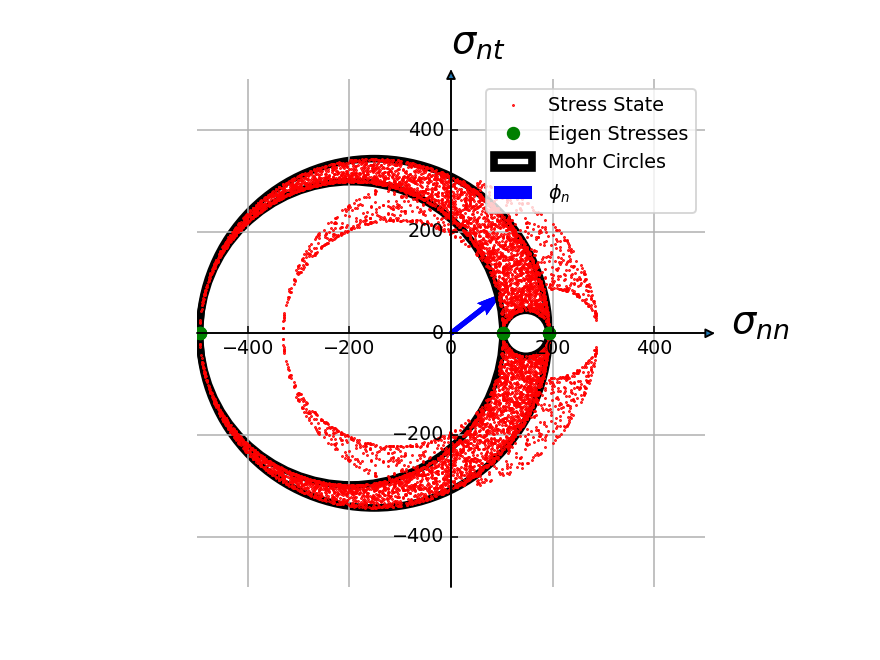

In [14]:
VP=np.linalg.eigvals(Sigma)

# display on graph
ax2.plot(VP,[0, 0, 0],'og',label='Eigen Stresses')
ax2.legend()
fig

# 5 - Plot the 3 mohr circles konwing the eigen stresses

<IPython.core.display.Javascript object>


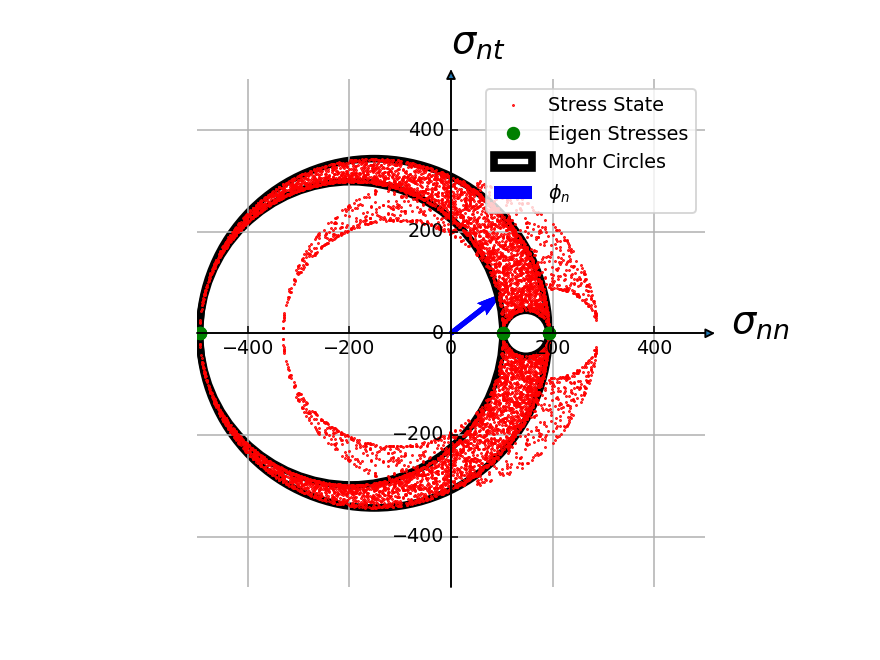

In [15]:
# 1st
Radius=(VP[1]-VP[0])/2.
ax2.add_patch(
    patches.Circle(
        (VP[0]+Radius,0.),   # (x,y)
        Radius,          # radius
        linewidth=4,
        fill=False,
    )
)
# 2nd
ax2.plot(VP,[0, 0, 0],'og')
Radius=(VP[2]-VP[1])/2.
ax2.add_patch(
    patches.Circle(
        (VP[1]+Radius,0.),   # (x,y)
        Radius,          # radius
        linewidth=4,
        fill=False,
    )
)
# 3rd
ax2.plot(VP,[0, 0, 0],'og')
Radius=(VP[2]-VP[0])/2.
ax2.add_patch(
    patches.Circle(
        (VP[0]+Radius,0.),   # (x,y)
        Radius,          # radius
        linewidth=4,
        fill=False,
        label='Mohr Circles'
    )
)
ax2.legend()
fig